<a href="https://colab.research.google.com/github/ShreyaA/PythonDataAnalysisBackup/blob/main/Copy_of_SL_Telecom_Consumer_Complaints_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orange is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.

The existing database will serve as a repository of public customer complaints filed against Orange.

It will help to pin down what is wrong with Orange's customer service.

**`Data Dictionary`**

1. Ticket #: Ticket number assigned to each complaint
2. Customer Complaint: Description of complaint
3. Date: Date of complaint
4. Time: Time of complaint
5. Received Via: Mode of communication of the complaint
6. City: Customer city
7. State: Customer state
8. Zipcode: Customer zip
9. Status: Status of complaint
10. Filing on behalf of someone

### Analysis Task

> Import data into environment.

> Provide the trend chart for the number of complaints at monthly and daily granularity levels.

> Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

> Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
>> Which state has the maximum complaints

>> Which state has the highest percentage of unresolved complaints

> Provide a table with the frequency of complaint types.
*Which complaint types are maximum i.e., around internet, network issues, or across any other domains*.

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

**The analysis results to be provided with insights wherever applicable**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Orange_telecom_complaints_data.csv to Orange_telecom_complaints_data.csv


In [ ]:
## drive link for the data source - https://drive.google.com/file/d/1-FsEcITxkPRQ9-xuRvY6xkfLadsXksR_/view?usp=sharing
df = pd.read_csv("Orange_telecom_complaints_data.csv")

In [ ]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [ ]:
## Creating a time based indexing. To enable, to perform some kind of time series analysis
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [ ]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
 11  date_index                   2224 non-null   object
dtypes: int64(1), object(11)
memory usage: 208.6+ KB


In [ ]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

<ipython-input-9-635c3682144e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_index"] = pd.to_datetime(df["date_index"])
<ipython-input-9-635c3682144e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])


In [ ]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [ ]:
df = df.set_index(df["date_index"])

In [ ]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


In [ ]:
df["Date_month_year"].value_counts()[:6]

Date_month_year
2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
Name: count, dtype: int64

Date_month_year
2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: count, dtype: int64


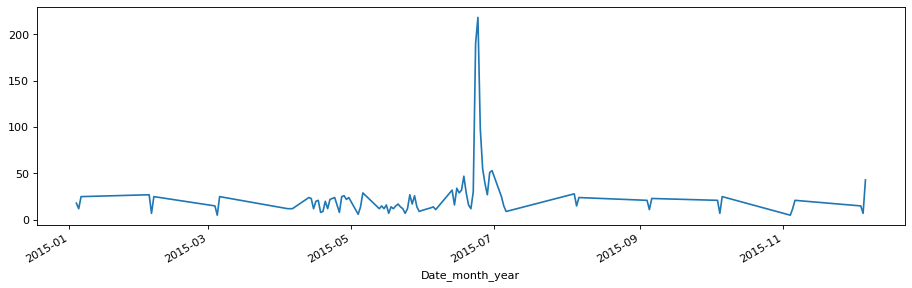

In [ ]:
## Check how many complaints - date wise or daily basis
from matplotlib.pyplot import figure
figure(figsize=(14, 4), dpi=80)

fd = df["Date_month_year"].value_counts()
print(fd.head())
fd.plot();

## or
#fd = df.groupby(pd.Grouper(freq="D")).size()
#print(fd.head())
#fd.plot();

In [ ]:
fm = df.groupby(pd.Grouper(freq="M")).size()
#fm = df.groupby(pd.Grouper(key='Date_month_year', freq='60s')).size()
## https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Grouper.html
## https://pbpython.com/pandas-grouper-agg.html

In [ ]:
df.groupby(pd.Grouper(freq="M")).size()

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

In [ ]:
fm.head(7)

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
Freq: M, dtype: int64

<Axes: xlabel='date_index'>

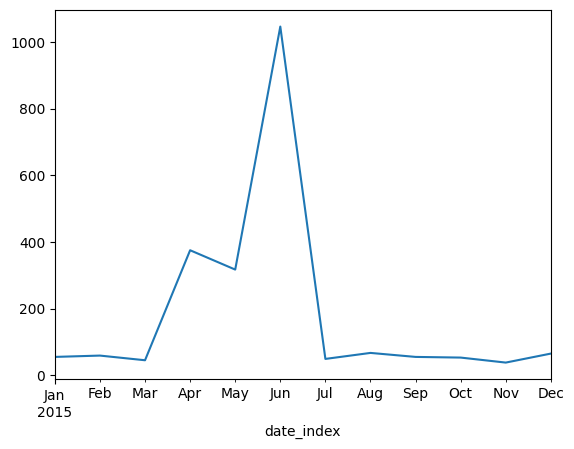

In [ ]:
fm.plot()

## More here : https://medium.com/nerd-for-tech/how-to-plot-timeseries-data-in-python-and-plotly-1382d205cc2

In [ ]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [ ]:
## Create a new categorical variable with value as Open and Closed.
## Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [ ]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [ ]:
print(df.groupby(["State"]).size())

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [ ]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"count"}, axis=1)[:5]

,State,count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [ ]:
## Provide state wise status of complaints in a stacked bar chart.
## Use the categorized variable from above data. Provide insights on:

## 1. Which state has the maximum complaints
## 2. Which state has the highest percentage of unresolved complaints

df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[ : 5]

## ANS : Georgia state has maximum complaints

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [ ]:
##
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


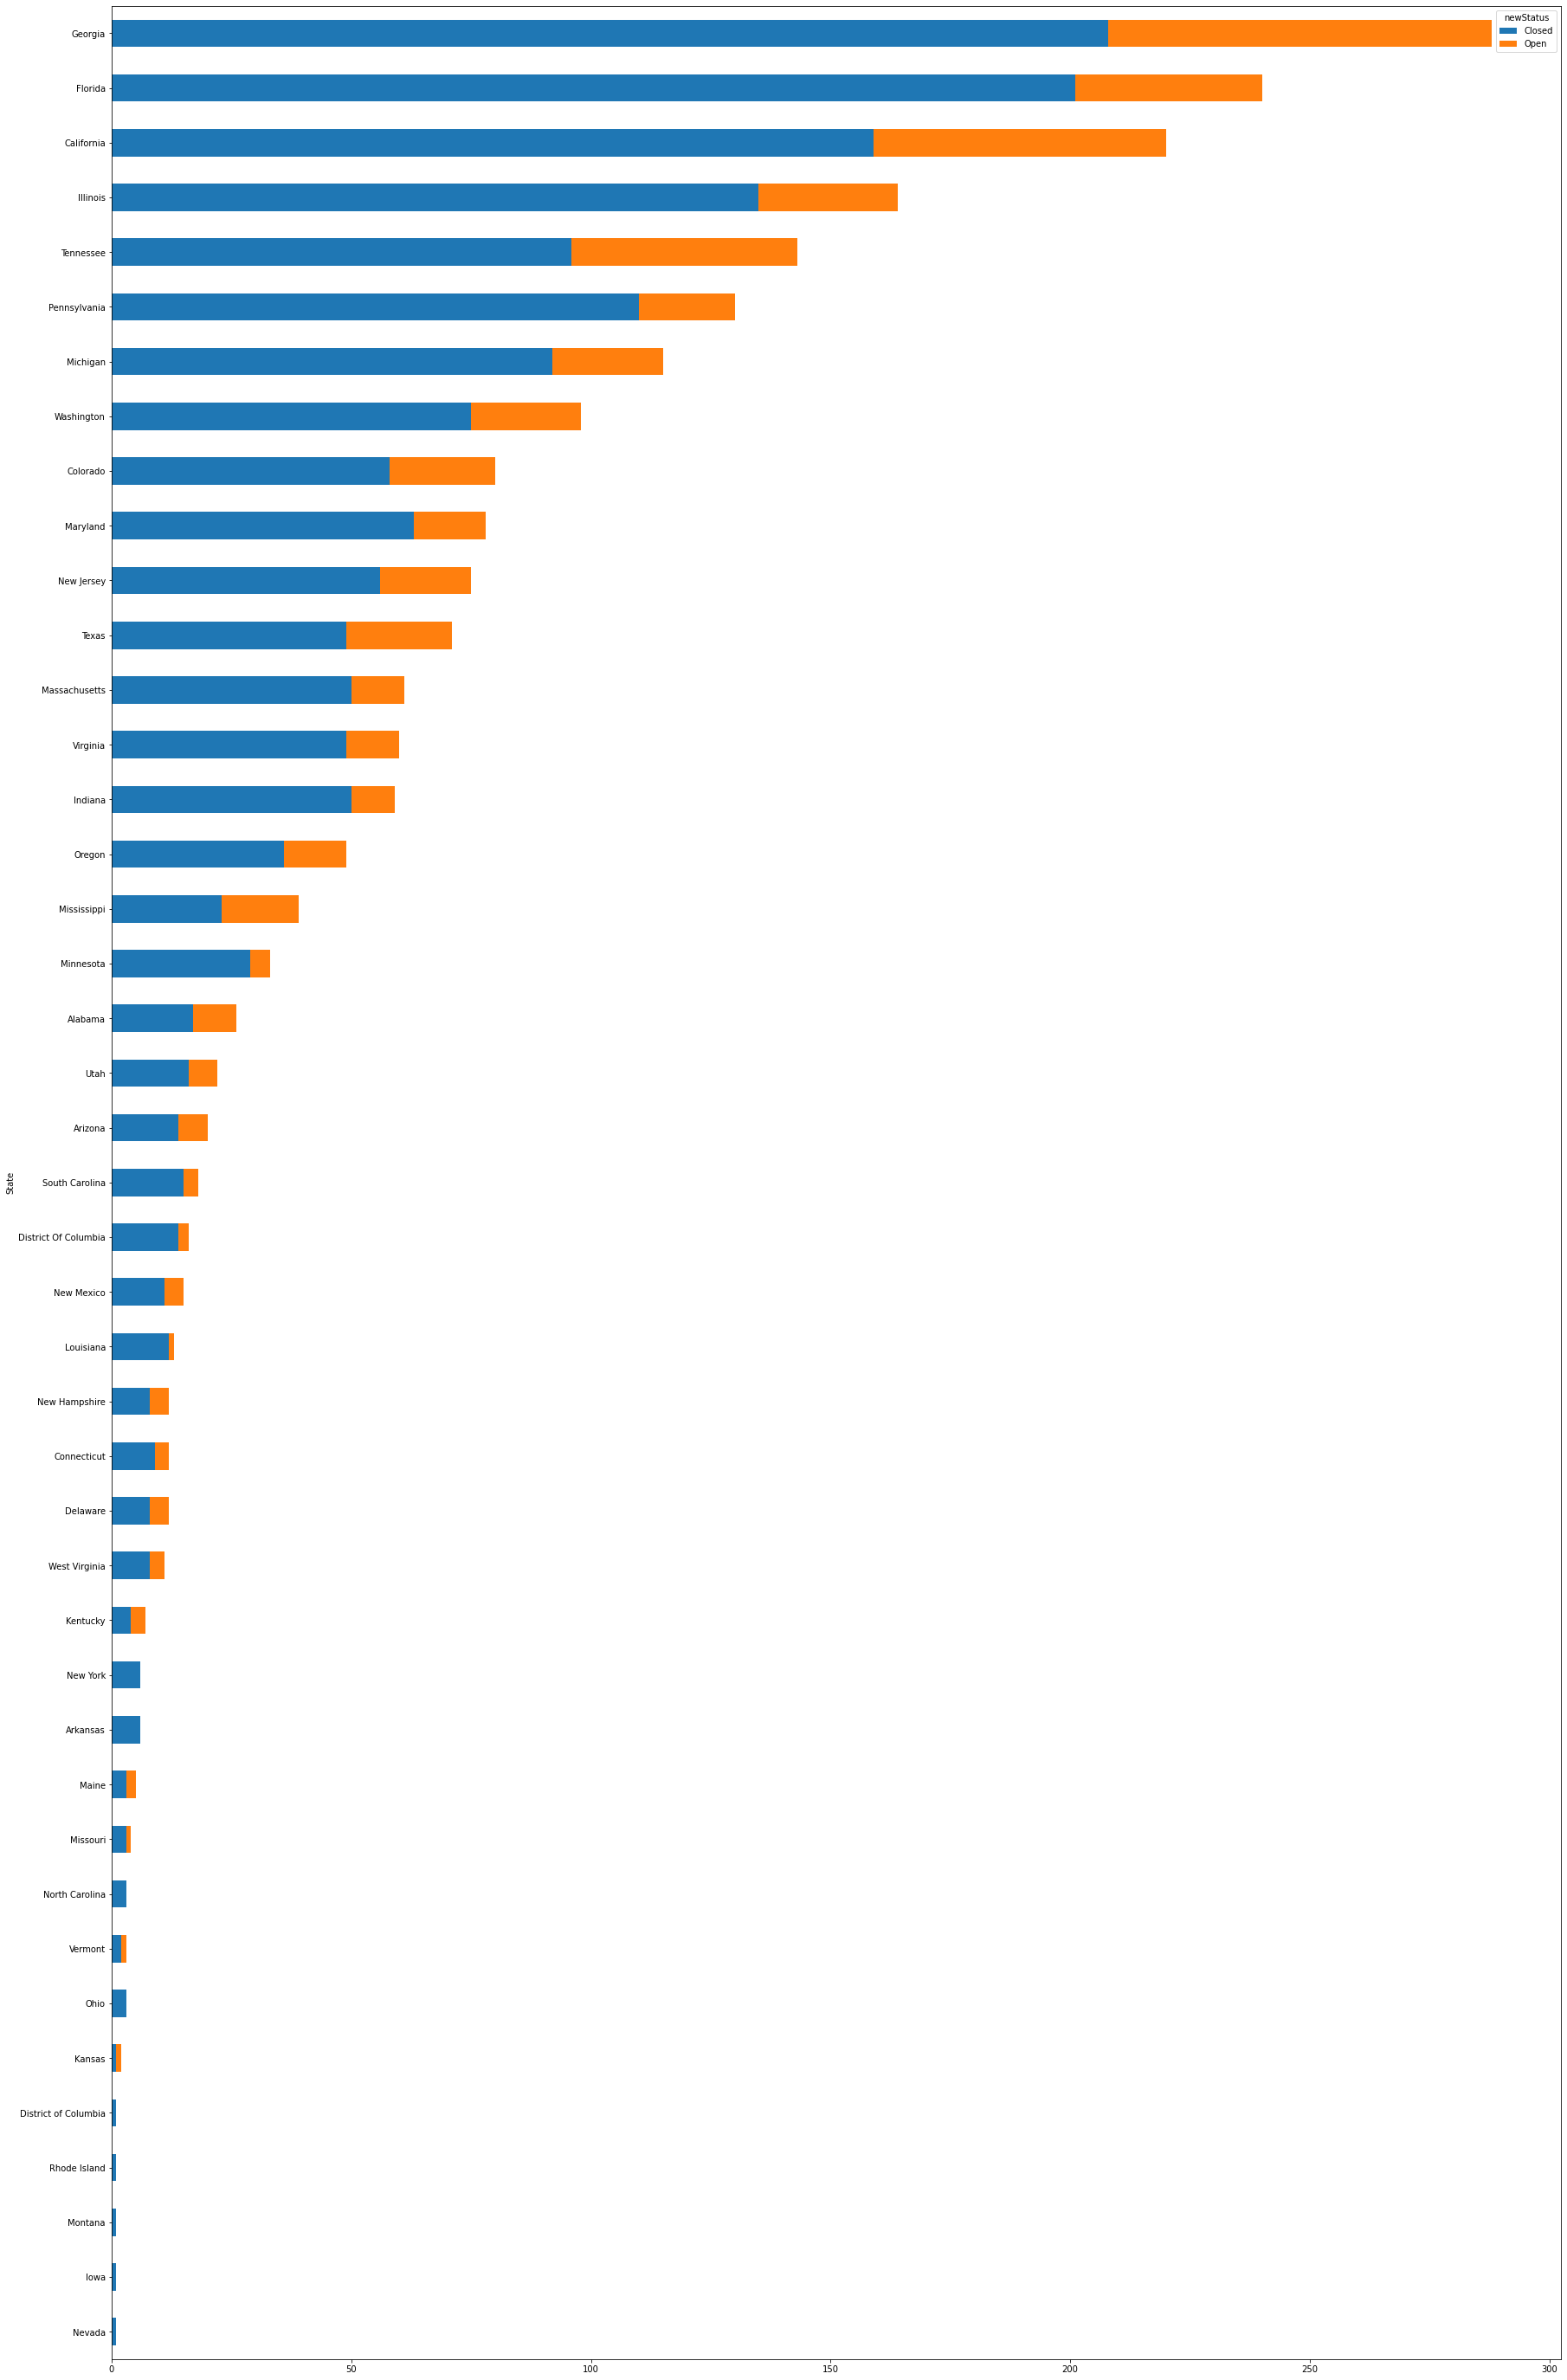

In [ ]:
Status_complaints['TotalComplaints'] = Status_complaints['Open'] + Status_complaints['Closed']
S1 = Status_complaints.sort_values(by = 'TotalComplaints').drop(['TotalComplaints'], axis = 1)
S1.plot(kind="barh", figsize=(30,50), stacked=True, ) #[:, df.columns!='TotalComplaints']

In [ ]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:1]

,State,Count
0,Georgia,288


In [ ]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [ ]:
## Extra code done for participants
##
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints['% Unresolved Complaints']=np.divide(Status_complaints['Open'],np.add(Status_complaints['Open'],Status_complaints['Closed']))*100
#Status_complaints['% Unresolved Complaints']=Status_complaints['Open']/(Status_complaints['Open']+Status_complaints['Closed'])*100
Status_complaints = Status_complaints.sort_values(by='% Unresolved Complaints',ascending=False)
Status_complaints.head(3)

## H.W
## WE NEED to first filter our data on absolute basis and then apply above logic.
## We would keep all those rows , where n(Open) > 0.5 * mean(Open)
## Now apply above logic

newStatus,Closed,Open,% Unresolved Complaints
State,,,
Kansas,1.0,1.0,50.000000
Kentucky,4.0,3.0,42.857143
Mississippi,23.0,16.0,41.025641


In [ ]:
#Status_complaints_imp = Status_complaints[Status_complaints['Open'] > 0.5 * np.mean(Status_complaints['Open'])]
Status_complaints_imp = Status_complaints[Status_complaints['Open'] > 0.5 * Status_complaints['Open'].mean()]
Status_complaints_imp

newStatus,Closed,Open,% Unresolved Complaints
State,,,
Mississippi,23.0,16.0,41.025641
Alabama,17.0,9.0,34.615385
Tennessee,96.0,47.0,32.867133
Texas,49.0,22.0,30.985915
Georgia,208.0,80.0,27.777778
California,159.0,61.0,27.727273
Colorado,58.0,22.0,27.500000
Oregon,36.0,13.0,26.530612
New Jersey,56.0,19.0,25.333333


**`IMP` ▶** Provide a table with the frequency of complaint types. Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

To solve the above problem we need to get deeper into GENSIM.  

## Gensim - Topic Modeling for Humans

<font color='red'><b>1. What is gensim?</b></font>

Gensim is a `Natural Language Processing` package that does ‘Topic Modeling for Humans’ and much more.

Topic modeling, is a technique to extract the underlying topics from large volumes of text. Gensim provides algorithms like **LDA** and **LSI** to do it.

> **LDA stands for Linear Discriminant Analysis**

> **LSI stands for Latent semantic analysis**

<font color='red'><b>2. What is a Dictionary and Corpus?</b></font>

In order to work on text documents, Gensim requires the words (aka tokens) be converted to unique ids. In order to achieve that, Gensim lets you create a Dictionary object that maps each word to a unique id.

<font color='red'>So, how to create a Dictionary?</font>

By converting your text/sentences to a [list of words] and pass it to the corpora.Dictionary() object.

The dictionary object is typically used to create a ‘bag of words’ Corpus. <font color='green'><b>It is this Dictionary and the bag-of-words (Corpus) that are used as inputs to topic modeling and other models that Gensim specializes in</b></font>.

> <font color='red'>What sort of text inputs can gensim handle?</font>

The input text typically comes in 3 different forms:

> As sentences stored in python’s native list object

> As one single text file, small or large.

> In multiple text files.

<font color='green'><b>Some NLP jargon.</b></font>

> A ‘token’ typically means a ‘word’.

> A ‘document’ can typically refer to a ‘sentence’ or ‘paragraph’ and a

> ‘corpus’ is typically a ‘collection of documents as a bag of words’.

**NOTE** : *For each document, a corpus contains each word’s id and its frequency count in that document. As a result, information of the order of words is lost.*

<font color='red'><b>3. How to create a Dictionary from a list of sentences? </b></font>

In gensim, the dictionary contains a map of all words (tokens) to its unique id.

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

# How to create a dictionary from a list of sentences?
documents = ["Natural language processing is a subfield of linguistics,",
             "computer science, and artificial intelligence concerned with the",
             "interactions between computers and human language, in particular ",
             "how to program computers to process and analyze large amounts of natural language data."]

documents_2 = ["Data science is an interdisciplinary field that uses scientific",
                "methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, ",
                "and apply knowledge and actionable insights from data across a broad range of application domains.",
              ]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]
print(texts)

# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)

[['Natural', 'language', 'processing', 'is', 'a', 'subfield', 'of', 'linguistics,'], ['computer', 'science,', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the'], ['interactions', 'between', 'computers', 'and', 'human', 'language,', 'in', 'particular'], ['how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data.']]
Dictionary(32 unique tokens: ['Natural', 'a', 'is', 'language', 'linguistics,']...)


In [ ]:
## As it says the dictionary has 32 unique tokens (or words).
## Let’s see the unique ids for each of these tokens.

# Show the word to id map
print(dictionary.token2id)

{'Natural': 0, 'a': 1, 'is': 2, 'language': 3, 'linguistics,': 4, 'of': 5, 'processing': 6, 'subfield': 7, 'and': 8, 'artificial': 9, 'computer': 10, 'concerned': 11, 'intelligence': 12, 'science,': 13, 'the': 14, 'with': 15, 'between': 16, 'computers': 17, 'human': 18, 'in': 19, 'interactions': 20, 'language,': 21, 'particular': 22, 'amounts': 23, 'analyze': 24, 'data.': 25, 'how': 26, 'large': 27, 'natural': 28, 'process': 29, 'program': 30, 'to': 31}


We have successfully created a Dictionary object. Gensim will use this dictionary to create a bag-of-words corpus where the words in the documents are replaced with its respective id provided by this dictionary.

If you get new documents in the future, it is also possible to update an existing dictionary to include the new words.

In [ ]:
documents_2 = ["Latent semantic indexing (LSI) is an indexing and retrieval method",
               "that uses a mathematical technique called singular value decomposition (SVD)",
               " to identify patterns in the relationships between the terms and concepts",
               " contained in an unstructured collection of text."]

texts_2 = [[text.lower() for text in doc.split()] for doc in documents_2]

dictionary.add_documents(texts_2)

# If you check now, the dictionary should have been updated with the new words (tokens).
print(dictionary)

print(dictionary.token2id)

Dictionary(57 unique tokens: ['Natural', 'a', 'is', 'language', 'linguistics,']...)
{'Natural': 0, 'a': 1, 'is': 2, 'language': 3, 'linguistics,': 4, 'of': 5, 'processing': 6, 'subfield': 7, 'and': 8, 'artificial': 9, 'computer': 10, 'concerned': 11, 'intelligence': 12, 'science,': 13, 'the': 14, 'with': 15, 'between': 16, 'computers': 17, 'human': 18, 'in': 19, 'interactions': 20, 'language,': 21, 'particular': 22, 'amounts': 23, 'analyze': 24, 'data.': 25, 'how': 26, 'large': 27, 'natural': 28, 'process': 29, 'program': 30, 'to': 31, '(lsi)': 32, 'an': 33, 'indexing': 34, 'latent': 35, 'method': 36, 'retrieval': 37, 'semantic': 38, '(svd)': 39, 'called': 40, 'decomposition': 41, 'mathematical': 42, 'singular': 43, 'technique': 44, 'that': 45, 'uses': 46, 'value': 47, 'concepts': 48, 'identify': 49, 'patterns': 50, 'relationships': 51, 'terms': 52, 'collection': 53, 'contained': 54, 'text.': 55, 'unstructured': 56}


<font color='red'><b> 4. How to create a bag of words corpus in gensim? </b></font>

The next important object you need to familiarize with in order to work in gensim is the Corpus (a Bag of Words). That is, it is a corpus object that contains the word id and its frequency in each document. You can think of it as gensim’s equivalent of a Document-Term matrix.

In [ ]:
## a dummy Example
# List with 2 sentences
my_docs = ["Who let the cats out?",
           "Who? Who? Who? Who?",
           "Cats vs dogs, who let them"]

# Tokenize the docs
from gensim.utils import simple_preprocess  ## Convert a document into a list of tokens.
tokenized_list = [simple_preprocess(doc) for doc in my_docs]
print('tokenized_list ',tokenized_list)
# Create the Corpus
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
print('mydict', mydict)
pprint(mycorpus)
print(mydict.token2id)


tokenized_list  [['who', 'let', 'the', 'cats', 'out'], ['who', 'who', 'who', 'who'], ['cats', 'vs', 'dogs', 'who', 'let', 'them']]
mydict Dictionary(8 unique tokens: ['cats', 'let', 'out', 'the', 'who']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(4, 4)],
 [(0, 1), (1, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]
{'cats': 0, 'let': 1, 'out': 2, 'the': 3, 'who': 4, 'dogs': 5, 'them': 6, 'vs': 7}


In [ ]:
mydict[0]

'cats'

**`How to interpret the above corpus?`**

The (0, 1) in line 1 means, the word with id=0 appears once in the 1st document.

Likewise, the (4, 4) in the second list item means the word with id 4 appears 4 times in the second document. And so on.

Well, this is not human readable. To convert the id’s to words, you will need the dictionary to do the conversion.

Let’s see how to get the original texts back.

In [ ]:
word_counts = [[(mydict[id], count) for id, count in line] for line in mycorpus]
pprint(word_counts)

[[('cats', 1), ('let', 1), ('out', 1), ('the', 1), ('who', 1)],
 [('who', 4)],
 [('cats', 1), ('let', 1), ('who', 1), ('dogs', 1), ('them', 1), ('vs', 1)]]


<font color='red'><b>5. How to save a gensim dictionary and corpus to disk and load them back?</b></font>

<pre>
# Save the Dict and Corpus
mydict.save('suven1.dict')  # save dict to disk
corpora.MmCorpus.serialize('bow_corpus.mm', mycorpus)  # save corpus to disk
</pre>

In [ ]:
mydict.save('suven1.dict')  # save dict to disk
corpora.MmCorpus.serialize('bow_corpus.mm', mycorpus)  # save corpus to disk

## An MM file contains a "mind map,"
## which is a visual diagram that consists of text, nodes, branches, shapes,
## and icons that represent ideas.


In [ ]:
## We have saved the dictionary and corpus objects. Let’s load them back.

# Load them back
loaded_dict = corpora.Dictionary.load('suven1.dict')
print(loaded_dict)

corpus = corpora.MmCorpus('bow_corpus.mm')
for line in corpus:
    print(line)

Dictionary(8 unique tokens: ['cats', 'let', 'out', 'the', 'who']...)
[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0)]
[(4, 4.0)]
[(0, 1.0), (1, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0)]


<font color='red'><b>6. How to create the TFIDF matrix (corpus) in gensim? </b></font>

The Term Frequency – Inverse Document Frequency(TF-IDF) is also a bag-of-words model but unlike the regular corpus, TFIDF down weights tokens (words) that appears frequently across documents.


> How is TFIDF computed ?

> **Refer :  http://tfidf.com/**

In [ ]:
## So, how to get the TFIDF weights?

## By training the corpus with models.TfidfModel().
## Then, apply the corpus within the square brackets
## of the trained tfidf model. See a dummy example below.

from gensim import models
import numpy as np

documents = ["This is the first line",
             "This is the second sentence",
             "This third document"]

# Create the Dictionary and Corpus
mydict = corpora.Dictionary([simple_preprocess(line) for line in documents])
corpus = [mydict.doc2bow(simple_preprocess(line)) for line in documents]

# Show the Word Weights in Corpus
for doc in corpus:
    print([[mydict[id], freq] for id, freq in doc])

# Create the TF-IDF model
tfidf = models.TfidfModel(corpus, smartirs='ntc')
## smartirs='ntc' is default value

print("------------------------------------------")
print("------------------------------------------")

# Show the TF-IDF weights
for doc in tfidf[corpus]:
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])


## Notice the difference in weights of the words between the original corpus and the tfidf weighted corpus.
## The words ‘is’ and ‘the’ occur in two documents and were weighted down.
## The word ‘this’ appearing in all three documents was removed altogether.
## In simple terms, words that occur more frequently across the documents get smaller weights.

[['first', 1], ['is', 1], ['line', 1], ['the', 1], ['this', 1]]
[['is', 1], ['the', 1], ['this', 1], ['second', 1], ['sentence', 1]]
[['this', 1], ['document', 1], ['third', 1]]
------------------------------------------
------------------------------------------
[['first', 0.66], ['is', 0.24], ['line', 0.66], ['the', 0.24]]
[['is', 0.24], ['the', 0.24], ['second', 0.66], ['sentence', 0.66]]
[['document', 0.71], ['third', 0.71]]


<hr />

### Above Information is enough to solve the last part of this case study , where , we have to find the major categories of complaints.

**Note** : `Customer complaint column contains Text words hence its a NLP problem-solving`

<hr />

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

import nltk
#nltk.download('stopwords')

stop = set(stopwords.words('english'))

exclude = set(string.punctuation)

lemma = WordNetLemmatizer()

In [ ]:
print('doesnt' in stop)
print('doesn\'t' in stop)
print(exclude)

False
True
{'"', '[', ':', '_', '>', '@', '*', '%', '#', '<', '!', '?', '$', '\\', '}', ')', '`', '/', ';', '~', '{', '.', '-', '=', '^', '|', ',', "'", ']', '+', '(', '&'}


### Stemming vs. Lemmatization

<img src="https://drive.google.com/uc?id=1zzZ_2FqReCbUmARvN9xvrrPIL8MyKVPI">

<hr />

<img src="https://drive.google.com/uc?id=1Hyz3QLypFR1Ccwi2yRvLDH8314EVjyO3">



In [ ]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop]) #because stop words like don't have punctuation marks in them
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    #normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    normalised = [lemma.lemmatize(word) for word in punc_free.split()]
    return normalised

In [ ]:
import nltk
nltk.download('wordnet')

doc_complete = df["Customer Complaint"].tolist()
#doc_clean = [clean(doc).split() for doc in doc_complete]
doc_clean = [clean(doc) for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(doc_clean)

[['comcast', 'cable', 'internet', 'speed'], ['payment', 'disappear', 'service', 'got', 'disconnected'], ['speed', 'service'], ['comcast', 'imposed', 'new', 'usage', 'cap', '300gb', 'punishes', 'streaming'], ['comcast', 'working', 'service', 'boot'], ['isp', 'charging', 'arbitrary', 'data', 'limit', 'overage', 'fee'], ['throttling', 'service', 'unreasonable', 'data', 'cap'], ['comcast', 'refuse', 'help', 'troubleshoot', 'correct', 'service'], ['comcast', 'extended', 'outage'], ['comcast', 'raising', 'price', 'available', 'ask'], ['billing', 'service', 'asked', 'disconnected'], ['yahoo', 'failure', 'restore', 'email', 'search', 'feature'], ['comcast', 'violating', 'open', 'internet', 'rule', 'blocking', 'hbo', 'go', 'access', 'sony', 'console'], ['internet', 'speed'], ['internet', 'disconnect', 'every', 'night'], ['internet', 'complaint'], ['internet', 'availability', 'speed'], ['comcast', 'owes', '65', 'claim', 'need', 'return', 'equipment', 'never'], ['horrible', 'internet', 'service']

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix[:10]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)]]

In [ ]:
from gensim.models import LdaModel

In [ ]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word = dictionary, passes= 30)

In [ ]:
topics = ldamodel.show_topics(num_words=5)
#show_topic(topicid, topn=10)
#show_topics(num_topics=10, num_words=10, log=False, formatted=True)
for topic in topics:
    print(topic)
    print()

(0, '0.066*"comcast" + 0.059*"pricing" + 0.053*"service" + 0.035*"comcastxfinity" + 0.030*"internet"')

(1, '0.131*"service" + 0.074*"comcast" + 0.049*"poor" + 0.043*"internet" + 0.022*"charged"')

(2, '0.219*"data" + 0.177*"cap" + 0.143*"comcast" + 0.042*"usage" + 0.020*"monopoly"')

(3, '0.294*"internet" + 0.167*"comcast" + 0.071*"service" + 0.042*"throttling" + 0.017*"charging"')

(4, '0.041*"comcast" + 0.038*"fee" + 0.038*"connection" + 0.027*"monthly" + 0.025*"outage"')

(5, '0.225*"comcast" + 0.101*"service" + 0.086*"issue" + 0.059*"billing" + 0.051*"xfinity"')

(6, '0.192*"billing" + 0.108*"comcast" + 0.081*"practice" + 0.046*"unfair" + 0.044*"cable"')

(7, '0.099*"comcast" + 0.069*"charge" + 0.028*"false" + 0.023*"contract" + 0.020*"terrible"')

(8, '0.117*"speed" + 0.109*"comcast" + 0.094*"internet" + 0.063*"service" + 0.050*"complaint"')



In [ ]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =10)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [ ]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,service,data,internet,comcast,bill,billing,comcast,pricing,comcast
1,comcast,cap,speed,pay,fee,comcast,service,connection,service
2,customer,comcast,comcast,business,charged,issue,internet,service,internet
3,complaint,xfinity,slow,account,monopolistic,practice,outage,connectivity,charge
4,price,usage,throttling,billed,comcast,unfair,paying,issue,cable
5,comcastxfinity,internet,high,phone,payment,service,without,cramming,problem
6,failure,charging,month,bandwidth,monthly,false,low,incorrect,poor
7,bill,sale,monopoly,without,email,switch,speed,installation,xfinity
8,poor,plan,promised,charge,credit,deceptive,12,terrible,overage
9,appointment,tucson,limit,help,increased,year,hbo,xfinitycomcast,complaint


Basics of LDA - Topic Modelling ▶

<img src="https://drive.google.com/uc?id=1HGeJgyYHXk0qirx3WMaGAwAkirwbks8b">

Extra Reading Resource - https://www.knowledgehut.com/blog/data-science/linear-discriminant-analysis-for-machine-learning